<a href="https://colab.research.google.com/github/sean-neary/Project-submission/blob/main/x_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas.testing as tm
from sklearn import datasets
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from numpy import arange
import itertools
import time
import statsmodels.api as sm
from sklearn.preprocessing import scale 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [32]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()
print("Number of games: ", len(df))
df = df.dropna()
df.head()


Number of games:  16719


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [33]:
df1 = df.drop(columns=['Name', 'Genre', 'Critic_Count','User_Count','Developer', 'Rating','Publisher','NA_Sales','JP_Sales','Other_Sales'])
df1.head()

,Platform,Year_of_Release,EU_Sales,Global_Sales,Critic_Score,User_Score
0,Wii,2006.0,28.96,82.53,76.0,8
2,Wii,2008.0,12.76,35.52,82.0,8.3
3,Wii,2009.0,10.93,32.77,80.0,8
6,DS,2006.0,9.14,29.80,89.0,8.5
7,Wii,2006.0,9.18,28.92,58.0,6.6


In [34]:
df = pd.get_dummies(df1)
df.head()

,Year_of_Release,EU_Sales,Global_Sales,Critic_Score,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,User_Score_0.5,User_Score_0.6,User_Score_0.7,User_Score_0.9,User_Score_1,User_Score_1.2,User_Score_1.3,User_Score_1.4,User_Score_1.5,User_Score_1.7,User_Score_1.8,User_Score_1.9,User_Score_2,User_Score_2.1,User_Score_2.2,User_Score_2.3,User_Score_2.4,User_Score_2.5,User_Score_2.6,...,User_Score_5.7,User_Score_5.8,User_Score_5.9,User_Score_6,User_Score_6.1,User_Score_6.2,User_Score_6.3,User_Score_6.4,User_Score_6.5,User_Score_6.6,User_Score_6.7,User_Score_6.8,User_Score_6.9,User_Score_7,User_Score_7.1,User_Score_7.2,User_Score_7.3,User_Score_7.4,User_Score_7.5,User_Score_7.6,User_Score_7.7,User_Score_7.8,User_Score_7.9,User_Score_8,User_Score_8.1,User_Score_8.2,User_Score_8.3,User_Score_8.4,User_Score_8.5,User_Score_8.6,User_Score_8.7,User_Score_8.8,User_Score_8.9,User_Score_9,User_Score_9.1,User_Score_9.2,User_Score_9.3,User_Score_9.4,User_Score_9.5,User_Score_9.6
0,2006.0,28.96,82.53,76.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008.0,12.76,35.52,82.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2009.0,10.93,32.77,80.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2006.0,9.14,29.80,89.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,2006.0,9.18,28.92,58.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
y = df.Global_Sales

X = df.drop(['Global_Sales'], axis=1).astype('float64')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

(6142, 109) (683, 109) (6142,) (683,)


LinearRegression()

In [38]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [39]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [40]:
print(predictions[0:5])
print(y_test[0:5])

[ 3.00102043  0.01563907 -0.49724364  0.07853103  0.65077448]
272      4.21
11819    0.07
15723    0.02
5040     0.38
3591     0.56
Name: Global_Sales, dtype: float64


Text(0, 0.5, 'Predictions')

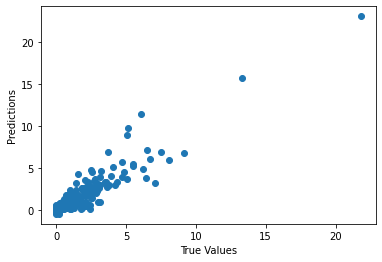

In [41]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [42]:
print ("Score:", model.score(X_test, y_test))

Score: 0.8418836510605148


In [43]:
import numpy as np
from sklearn.model_selection import KFold # import KFold
columns = 'Year_of_Release	EU_Sales	Global_Sales	Critic_Score	Platform_3DS	Platform_DC	Platform_DS	Platform_GBA	Platform_GC	Platform_PC	Platform_PS	Platform_PS2	Platform_PS3	Platform_PS4	Platform_PSP	Platform_PSV	Platform_Wii	Platform_WiiU	Platform_X360	Platform_XB	Platform_XOne	User_Score_0.5	User_Score_0.6	User_Score_0.7	User_Score_0.9	User_Score_1	User_Score_1.2	User_Score_1.3	User_Score_1.4	User_Score_1.5	User_Score_1.7	User_Score_1.8	User_Score_1.9	User_Score_2	User_Score_2.1	User_Score_2.2	User_Score_2.3	User_Score_2.4	User_Score_2.5	User_Score_2.6	...	User_Score_5.7	User_Score_5.8	User_Score_5.9	User_Score_6	User_Score_6.1	User_Score_6.2	User_Score_6.3	User_Score_6.4	User_Score_6.5	User_Score_6.6	User_Score_6.7	User_Score_6.8	User_Score_6.9	User_Score_7	User_Score_7.1	User_Score_7.2	User_Score_7.3	User_Score_7.4	User_Score_7.5	User_Score_7.6	User_Score_7.7	User_Score_7.8	User_Score_7.9	User_Score_8	User_Score_8.1	User_Score_8.2	User_Score_8.3	User_Score_8.4	User_Score_8.5	User_Score_8.6	User_Score_8.7	User_Score_8.8	User_Score_8.9	User_Score_9	User_Score_9.1	User_Score_9.2	User_Score_9.3	User_Score_9.4	User_Score_9.5	User_Score_9.6'.split()
df = df.drop(['Global_Sales'], axis=1).astype('float64')
y = df.Global_Sales
X = pd.DataFrame(df, columns = columns)

In [45]:
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# create model
model = linear_model.LinearRegression()
# evaluate model
scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1)
# report performance

print('Score: %.3f (%.3f)' % (mean(scores), std(scores)))

Score: nan (nan)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 663, in fit
    X, y, accept_sparse=accept_sparse, y_numeric=True, multi_output=True
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 576, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/